# Satelite Altimeter Data for OTI

for details: [Radwave read the docs]( https://radwave.readthedocs.io/en/latest/)

https://radwave.readthedocs.io/en/latest/method.html#satellite-altimeter-data

In [1]:

import math 
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sys
import RADWave as rwave

Loading RADWave library and initialisation
We first start by importing RADwave library into our working space.

In [2]:
#OTI extent - data is close to OTI as possible, focussed on east (exposed) side
#bboxextent = [152.1,156,-25,-22]

wa = rwave.waveAnalysis(altimeterURL='data/radwave_data.txt', bbox=[152.0,155.0,-36.0,-34.0], 
                  stime=[1985,1,1], etime=[2018,12,31])

Processing Alitmeter Data

In [7]:
wa.processAltimeterData(altimeter_pick='all', saveCSV = 'data/altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               6   
   +  name JASON-3     / number of tracks                               4   
   +  name SARAL       / number of tracks                               6   
   +  name SENTINEL-3A / number of tracks                               6   
   +  name CRYOSAT-2   / number of tracks                               6   
   +  name ENVISAT     / number of tracks                               6   
   +  name GEOSAT      / number of tracks                               6   
   +  name ERS-2       / number of tracks                               6   
   +  name GFO         / number of tracks                               6   
   +  name TOPEX       / number of tracks                               6   
 
Processing altimeter dataset took:  10 s


In [3]:
wa.readAltimeterData(saveCSV = 'data/altimeterData.csv')

Reading Processed Altimeter Dataset 



Visualise

In [6]:
# mapextent = [160, 150, -26, -18]

# wa.visualiseData(title="Relevant Altimeter Data Tracks", extent=mapextent, 
#                  addcity=['One Tree Island', 152.1, -23.5], markersize=40, zoom=8,
#                  fsize=(8, 7), fsave='altimeterdata')

wa.visualiseData(title="Altimeter data tracks", extent=[149.,158.,-38.,-32.], 
                 addcity=['Sydney', 151.2093, -33.8688], markersize=40, zoom=8,
                 fsize=(8, 7), fsave='altimeterdata')

<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not 

Figure saved:  altimeterdata


## Computing wave regime for specified location

To perform wave analysis and compute the wave parameters discussed in the documentation, we run the generateTimeSeries function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both instantaneous and monthly wave variables:

significant wave height (m) - wh & wh_rolling
wave period (s) - period & period_rolling
wave energy flux (kW/m) - power & power_rolling
wave average energy density (J/m2) - energy & energy_rolling
wave group velocity (m/s) - speed & speed_rolling

In [4]:
timeseries = wa.generateTimeSeries()
timeseries

date      wh  wh_rolling    period  \
0     1985-04-13 08:22:39.835939  3.3380    3.338000  6.820216   
1     1985-04-16 08:31:20.722658  3.2370    3.287500  7.593262   
2     1985-04-16 08:31:30.031252  3.2520    3.275667  8.068063   
3     1985-04-16 08:31:38.363283  3.1695    3.249125  8.171445   
4     1985-04-22 08:48:59.253906  2.2560    3.050500  7.566001   
...                          ...     ...         ...       ...   
13951 2018-12-29 07:19:51.140629  2.9740    2.273524  6.192599   
13952 2018-12-29 07:20:08.464846  2.8570    2.280308  6.659423   
13953 2018-12-29 22:55:25.789058  3.4175    2.297506  6.612160   
13954 2018-12-29 22:55:36.484374  3.3180    2.309372  6.312323   
13955 2018-12-29 22:55:50.749997  3.3770    2.321644  6.370426   

       period_rolling       power  power_rolling        energy  \
0            6.820216  149.027408     149.027408  13999.973663   
1            7.206739  156.030380     152.528894  13165.578678   
2            7.493847  167.326889     157.461559  13287.877870   
3            7.663247  160.981444     158.341531  12622.232507   
4            7.643797   75.516168     141.776458   6394.885084   
...               ...         ...            ...           ...   
13951        5.768833  107.411377      71.270798  11113.133738   
13952        5.779189  106.598865      71.681589  10255.932559   
13953        5.784101  151.445293      73.006138  14674.780044   
13954        5.790243  136.281637      73.741900  13832.711440   
13955        5.796912  142.470834      74.531888  14329.026150   

       energy_rolling      speed  speed_rolling        lat        lon  day  \
0        13999.973663  10.644835      10.644835 -34.356148  152.33946   13   
1        13582.776170  11.851388      11.248111 -34.494278  153.30789   16   
2        13484.476737  12.592446      11.696223 -35.012566  153.01370   16   
3        13268.915679  12.753801      11.960618 -35.475792  152.74774   16   
4        11894.109560  11.808839      11.930262 -35.719948  154.70033   22   
...               ...        ...            ...        ...        ...  ...   
13951     7426.647231   9.665265       9.003861 -34.503365  153.59314   29   
13952     7459.545898  10.393873       9.020024 -35.520107  153.29330   29   
13953     7584.242714  10.320107       9.027690 -34.340900  152.78973   29   
13954     7656.899327   9.852127       9.037277 -34.838604  153.08568   29   
13955     7733.590440   9.942813       9.047685 -35.500633  153.48671   29   

       month  year  
0          4  1985  
1          4  1985  
2          4  1985  
3          4  1985  
4          4  1985  
...      ...   ...  
13951     12  2018  
13952     12  2018  
13953     12  2018  
13954     12  2018  
13955     12  2018  

[13956 rows x 16 columns]

<Axes: xlabel='date'>

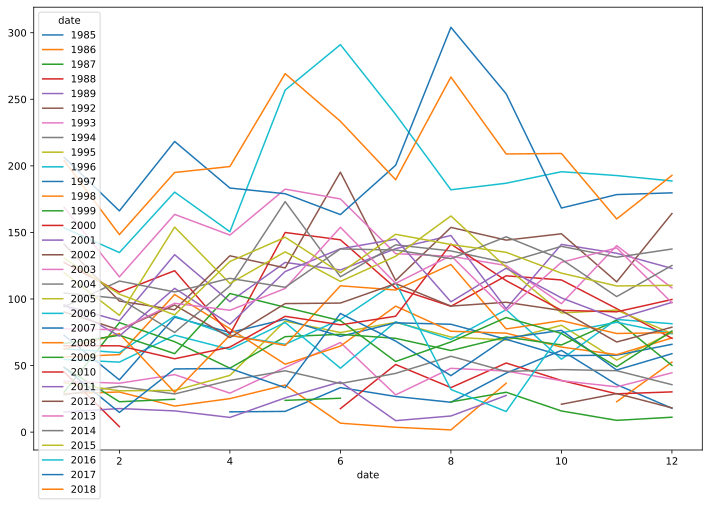

In [9]:
timeseries.to_csv('OTI_RADWAVE_Large_bbox.csv')
time_var = timeseries["date"]

timeseries.wh.groupby([timeseries.date.dt.month,timeseries.date.dt.year]).sum().unstack().plot(figsize=(12,8))
#timeseries.power

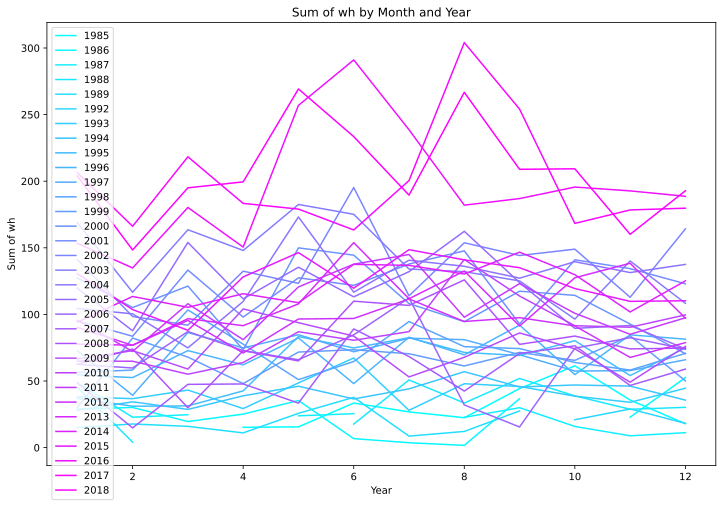

In [10]:
# Assuming 'timeseries' is your DataFrame containing the data

# Calculate the sum of 'wh' column for each month and year
grouped_data = timeseries.groupby([timeseries.date.dt.month, timeseries.date.dt.year])['wh'].sum()

# Unstack the data to have months as columns and years as rows
unstacked_data = grouped_data.unstack()

# Create a gradient colormap using the 'cool' color map
color_map = plt.get_cmap('cool')

# Get the number of columns in the unstacked data (months)
num_columns = len(unstacked_data.columns)

# Generate an array of evenly spaced numbers from 0 to 1 to represent the color gradient
color_range = np.linspace(0, 1, num_columns)

# Plot the data with the gradient colors
fig, ax = plt.subplots(figsize=(12, 8))
for i, (column, color_val) in enumerate(zip(unstacked_data.columns, color_range)):
    ax.plot(unstacked_data.index, unstacked_data[column], label=column, color=color_map(color_val))

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Sum of wh')
ax.set_title('Sum of wh by Month and Year')
ax.legend()

# Show the plot
plt.show()

# Plotting time series

Max wave height: 12.183 m
Mean wave height: 2.397 m
Median wave height: 2.170 m
95th percentile wave height: 4.336 m


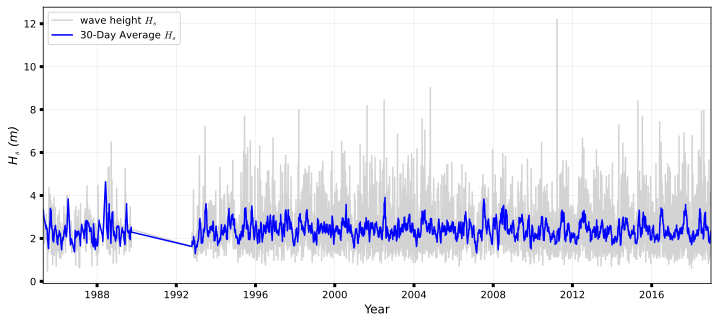

Figure saved:  seriesH


(None,)

In [5]:
# Significant wave height
wa.plotTimeSeries(time=[0,2024],series='H', fsize=(12, 5), fsave='seriesH'), 
#wa.plotTimeSeries(time=[0,2016],series='H', fsize=(12, 5), fsave='seriesH')

Max wave period: 16.001 s
Mean wave period: 6.319 s
Median wave period: 6.193 s
95th percentile wave period: 8.031 s


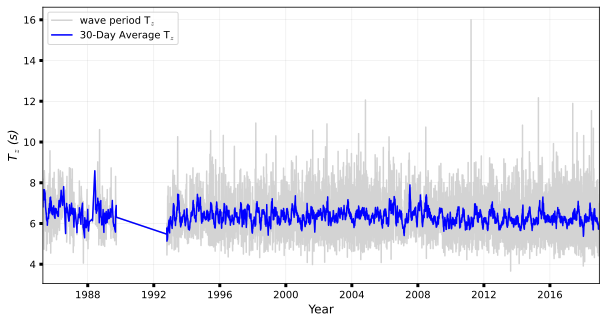

Max wave power: 4657.552 kW/m
Mean wave power: 90.551 kW/m
Median wave power: 57.102 kW/m
95th percentile wave power: 278.846 kW/m


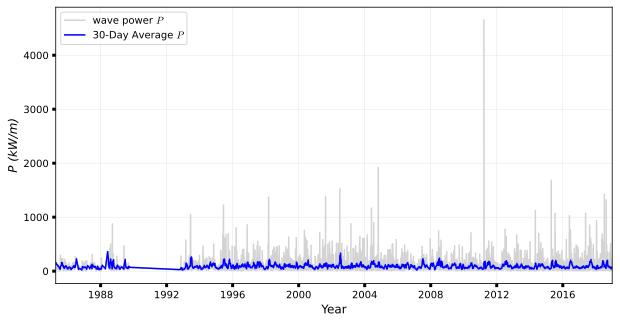

Max wave energy: 186493.248 J/m2
Mean wave energy: 8400.623 J/m2
Median wave energy: 5916.625 J/m2
95th percentile wave energy: 23622.898 J/m2


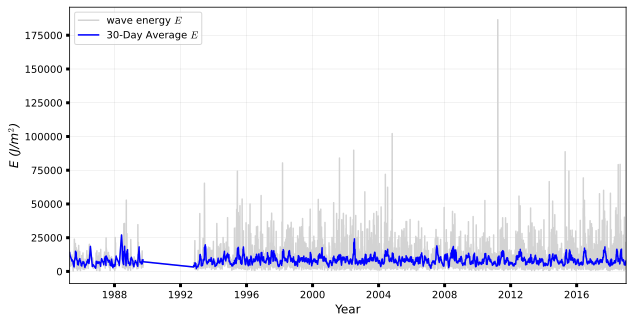

Max wave celerity: 24.974 m/s
Mean wave celerity: 9.863 m/s
Median wave celerity: 9.667 m/s
95th percentile wave celerity: 12.534 m/s


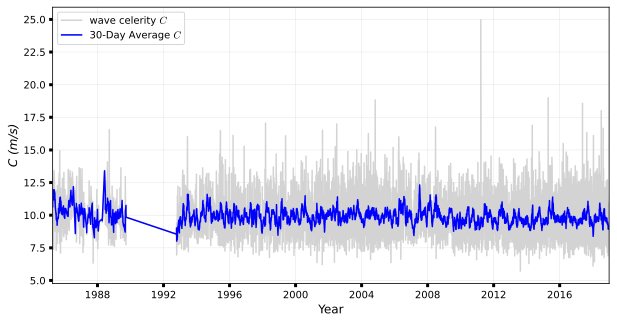

In [6]:
start = 0 
end = 2024

# Wave period
wa.plotTimeSeries(time=[start,end],series='T', fsize=(10, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[start,end],series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[start,end],series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[start,end], series='Cg', fsize=(10, 5), fsave=None)
